<div Style="text-align: center;line-height: 30px;font-size:32px;font-weight: bold"> Data Augmentation</div>
***
Este *notebook* esta destinado para tareas de *data augmentation*. Sin transformaciones de los ficheros que contienen las coordenadas. Por lo tanto, solo esta destinado para los recortes de los fitolitos.

Si desea ver el notebook que realiza tareas de data augmentation y a su vez transforma las coordenadas, vease "Data_augmentation.ipynb"

In [1]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact_manual, fixed

import os.path

from math import ceil

import numpy as np
import random
from random import randint

from skimage import io
from skimage.transform import rotate, rescale, resize

import matplotlib.pyplot as plt

import json

# 1. Cambios de tamaño en la imagen

Debemos de tener en cuenta que en todos los cambios que realicemos sobre una imagen, tendremos que, a su vez, cambiar las etiquetas realizadas sobre la imagen con los cambios correspondientes. Para que las coordenadas de las etiquetas realizadas en un primera ocasión coincidan con las etiquetas en la imagen modificada.

En este caso, debemos de rescalar las coordenadas proporcionalmente al factor de rescalado.

In [2]:
import warnings
warnings.filterwarnings('ignore')

original_img = io.imread("../../../doc/general_doc/img/Bilobate/2.jpg")

# Factores de rescalado
factors = [0.6, 0.8, 1.2]

## 1.1. Rescalado en los dos ejes

In [3]:
r_imgs = []
r_imgs.append(rescale(original_img, factors[0]))
r_imgs.append(rescale(original_img, factors[1]))
r_imgs.append(rescale(original_img, factors[2]))

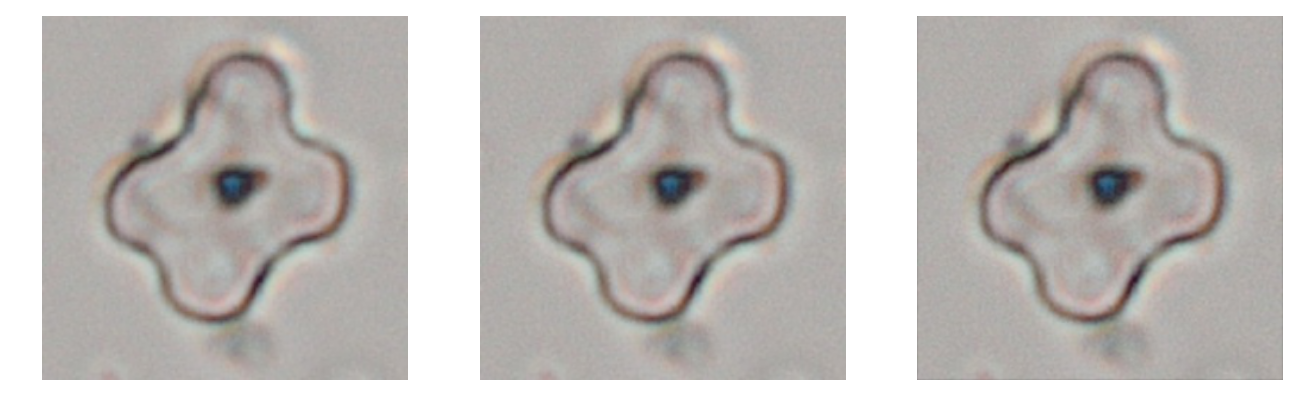

In [4]:
# Mostramos las imagenes resultantes
# Las imágenes se muestran con el mismo 
# tamaño, aunque sean de distinto tamaño

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_imgs[i])
    ax.axis('off')
    i += 1

## 1.2. Rescalado en el eje horizontal

In [5]:
def rescale_one_image_axis(image, factor, axis=0):
    h, w = image.shape[:2]
    
    if axis == 0:
        w = round(w * factor)
    elif axis == 1:
        h = round(h * factor)
    else:
        raise "Axis should be equalts to 0 o 1"
    
    return resize(image,(h,w))

In [6]:
r_h_imgs = []
r_h_imgs.append(rescale_one_image_axis(original_img, factors[0]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[1]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[2]))

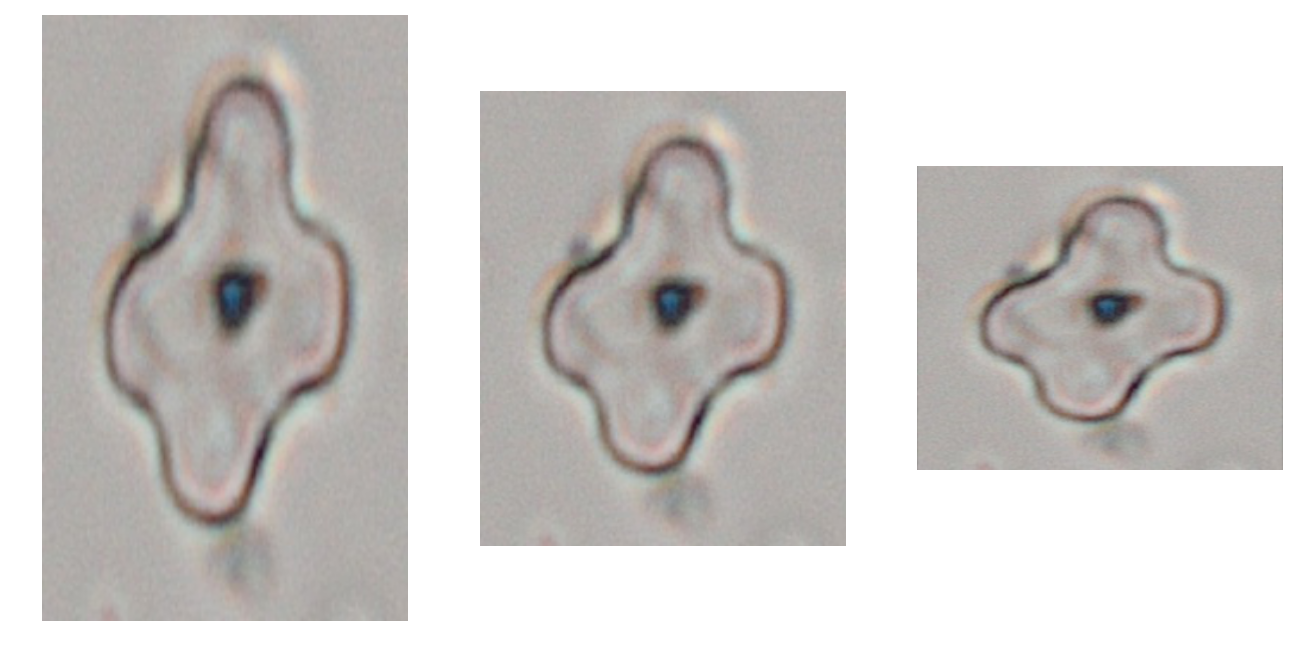

In [7]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_h_imgs[i])
    ax.axis('off')
    i += 1

## 1.3. Rescalado en el eje vertical

In [8]:
r_v_imgs = []
r_v_imgs.append(rescale_one_image_axis(original_img, factors[0],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[1],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[2],1))

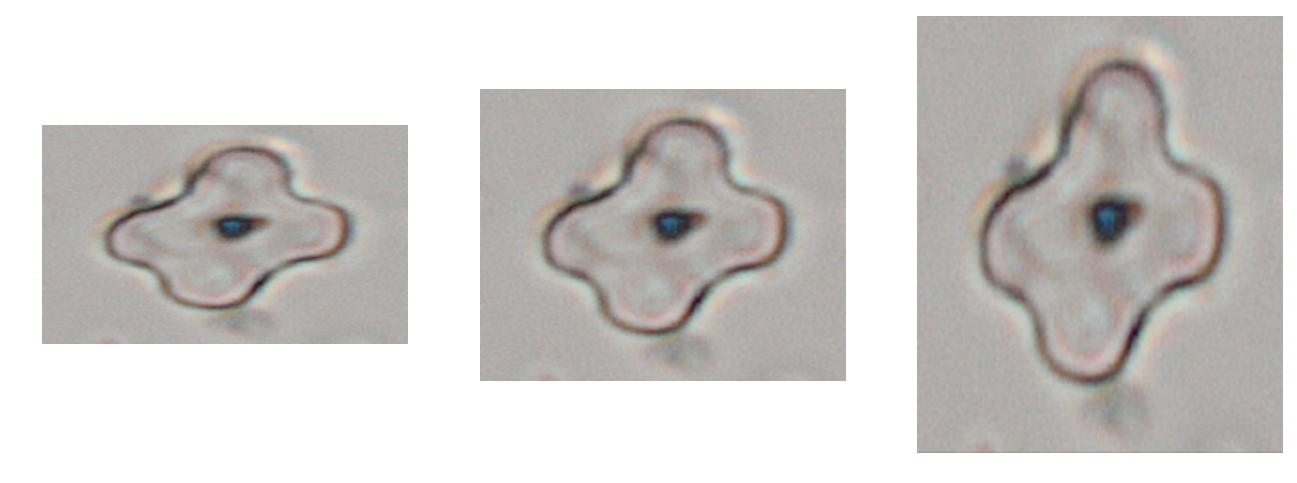

In [9]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_v_imgs[i])
    ax.axis('off')
    i += 1

# 2. Espejar imágenes

En este caso, deberemos de espejar las coordenadas, como espejamos la imagen.

In [10]:
flipped_imgs = []

# Damos la vuelta a la imagen en el eje vertical
flipped_imgs.append(np.flipud(original_img))

# Damos la vuelta a la imagen en el eje horizontal
flipped_imgs.append(np.fliplr(original_img))

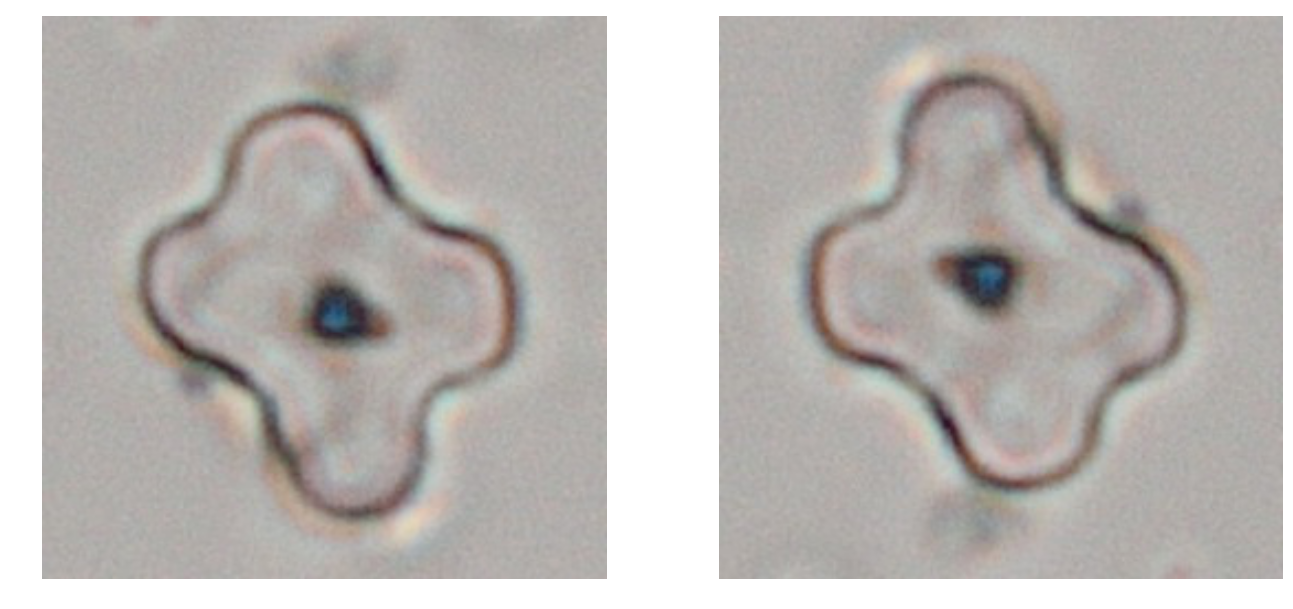

In [11]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=2, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(flipped_imgs[i])
    ax.axis('off')
    i += 1

# 3. Ruido en las imágenes

En este caso, las coordenadas no se ven modificadas.

In [12]:
from skimage.util import random_noise

In [13]:
noise_imgs = []

# Valores por defecto mode='gaussian'
# mean = 0, var = 0.01
# amount = 0.05, salt_vs_pepper = 0.5

noise_imgs.append(original_img)
noise_imgs.append(random_noise(original_img,mode="gaussian", mean=0, var=0.01))
noise_imgs.append(random_noise(original_img,mode="pepper", amount=0.1))
# Se puede utilizar el parametro local_vars a modo de matriz
# para indicar la varianza local en cada pixel, para el modo "localvar"
noise_imgs.append(random_noise(original_img,mode="localvar"))
#noise_imgs.append(random_noise(original_img,mode="poisson"))
noise_imgs.append(random_noise(original_img,mode="salt", amount=0.1))
noise_imgs.append(random_noise(original_img,mode="s&p", amount=0.05, salt_vs_pepper=0.5))
noise_imgs.append(random_noise(original_img,mode="speckle", mean=0, var=0.1))

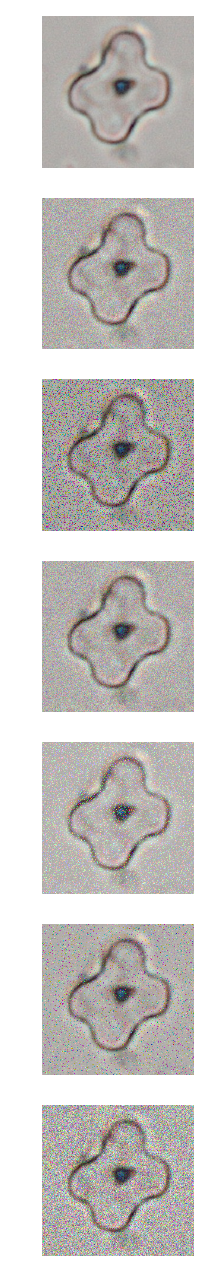

In [14]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(nrows= 7,
                         figsize=(16, 16), 
                         subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
i=0
for ax in axes:

    ax.imshow(noise_imgs[i])
    ax.axis('off')
    i += 1

# 4. Rotaciones de 90, 180 y 270 grados

Rotamos las imágenes y , con ellas, las coordenadas.

In [15]:
rot_imgs = []

rot_imgs.append(rotate(original_img,90,resize=True))
rot_imgs.append(rotate(original_img,180,resize=True))
rot_imgs.append(rotate(original_img,270,resize=True))

Rotamos las coordenadas

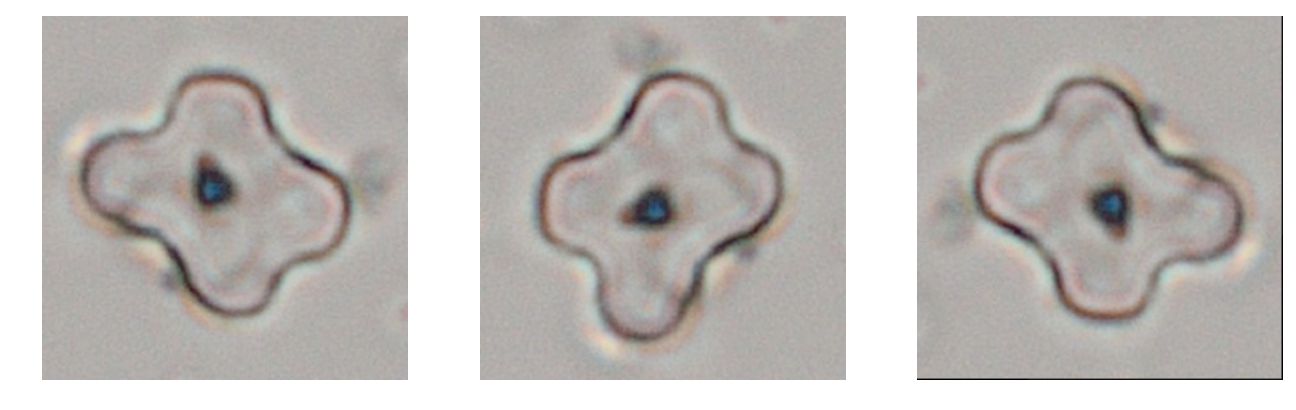

In [16]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(rot_imgs[i])
    ax.axis('off')
    i += 1

# 5. Filtrar imagen

In [17]:
from skimage import exposure

fils_imgs = []

fils_imgs.append(original_img)
# 10 es un valor alto para el mínimo
p2, p98 = np.percentile(original_img, (5, 100))
fils_imgs.append(exposure.rescale_intensity(original_img, in_range=(p2, p98)))

# 90 es un valor bajo para el máximo
p2, p98 = np.percentile(original_img, (0, 90))
fils_imgs.append(exposure.rescale_intensity(original_img, in_range=(p2, p98)))

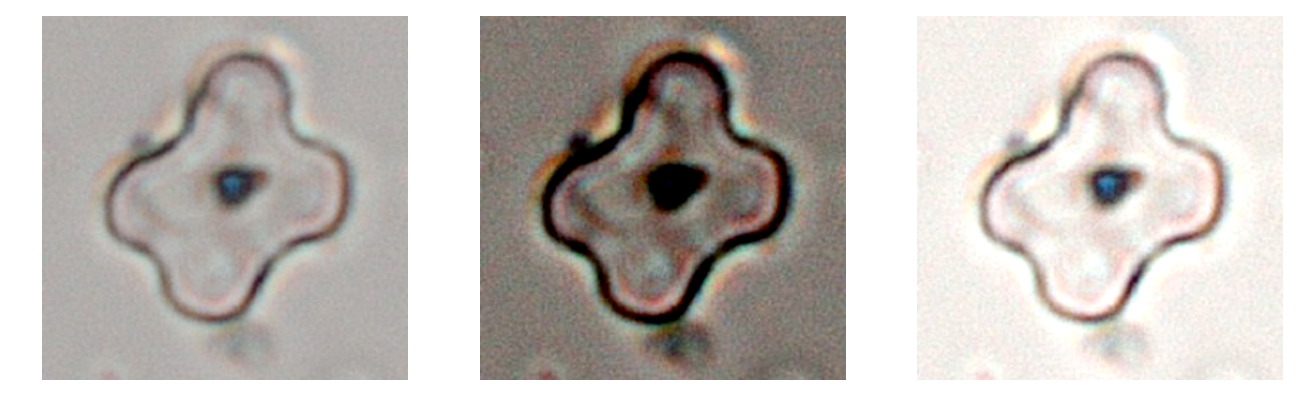

In [18]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(fils_imgs[i])
    ax.axis('off')
    i += 1

# Generador de imágenes

In [19]:
# Contamos el número de imágenes que tenemos en
# el directorio de las imágenes etiquetadas
import os, os.path
import re

path="../../rsc/img/"
dest_path = "D:/imgaum"

pattern = re.compile("^.*\.jpg$", re.IGNORECASE)

def list_images(path='../rsc/img/Default'):
    images_list = []
    for name in os.listdir(path):
        if pattern.match(name):
            images_list.append(path + "/" + name)
    return images_list

In [20]:
probs_technic = 0.30
probs_especific_technic = 0.76
probs_subespecific_technic = [0.76, 0.84, 0.92] 

In [21]:
def random_resize(image):
    # Cambio de tamaño de imagen
    
    image = np.array(image)
    
    # 1. Ambos ejes
    rands_for_resize = [random.random() for j in range(3)]
    
    if rands_for_resize[0] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)
        image = rescale(image, rand)
        
    # 2. Eje horizontal
    if rands_for_resize[1] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)
        image = rescale_one_image_axis(image, rand)
    
    # 3. Eje vertical
    if rands_for_resize[2] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)
        image = rescale_one_image_axis(image, rand, 1)
    return image

In [22]:
def random_flip(image):
    
    image = np.array(image)
    
    rands_for_flip = [random.random() for j in range(2)]
    if rands_for_flip[0] > probs_especific_technic:
        image = np.flipud(image)
    if rands_for_flip[1] > probs_especific_technic:
        image = np.fliplr(image)
    return image

In [23]:
def my_random_noise(image):
    rands_for_noise = [random.random() for j in range(6)]
    if rands_for_noise[0] > probs_especific_technic:
        image = random_noise(image,mode="gaussian", mean=0, var=0.01)
    if rands_for_noise[1] > probs_especific_technic:
        image = random_noise(image,mode="pepper", amount=0.1)
    if rands_for_noise[2] > probs_especific_technic:
        image = random_noise(image,mode="localvar")
    if rands_for_noise[3] > probs_especific_technic:
        image = random_noise(image,mode="salt", amount=0.1)
    if rands_for_noise[4] > probs_especific_technic:
        image = random_noise(image,mode="s&p", amount=0.05, salt_vs_pepper=0.5)
    if rands_for_noise[5] > probs_especific_technic:
        image = random_noise(image,mode="speckle", mean=0, var=0.1)
    return image

In [24]:
def my_filter(image):
    rands_for_filter = random.random()
    if rands_for_filter > 0.5:
        # 10 es un valor alto para el mínimo
        p2, p98 = np.percentile(image, (2, 100))
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    else:
        # 90 es un valor bajo para el máximo
        p2, p98 = np.percentile(image, (0, 90))
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return image

In [25]:
def random_rotate(image):
    
    mod_image = np.array(image)
    angle = randint(30, 330)
    mod_image = rotate(mod_image, angle, resize=True, mode='edge')
        
    return mod_image

In [27]:
import copy

phytoliths_types = {'Rondel': None, 'Bulliform': None, 'Bilobate': None, 'Trichomas': None,
                     'Saddle': None, 'Spherical': None, 'Cyperaceae': None}

for k, v in phytoliths_types.items():
    phytoliths_types[k] = list_images(path + k)

initial_value = 0
end_value = 6000

def data_augmentation_generator(number_of_images, dest_path):
    
    # Calculamos el número de imágenes que hay
    # que generar por cada imagen hasta llegar
    # al número especificado por el usuario
    
    images_per_image = []
    for k, v in phytoliths_types.items():
        images_per_image.append(ceil(number_of_images / len(v)))
    
    # Generamos imágenes con filtros aleatorios
    # hasta llegar a completar el número deseado
    class_num= 0
    for k, v in phytoliths_types.items():
        count = 0
        for name in v:
            if count == number_of_images:
                break
            
            original_image = rescale(io.imread(name), 0.5)
            image_name = os.path.split(name)[1].split(".")[0]
            image_with_format = image_name + ".jpg"

            # Cargamos coordenadas, si existen,
            # y si no existe fichero de coordenadas
            # pasamos a la siguiente imagen
            for i in range(images_per_image[class_num]):
                # Paramos si hemos llegado al número
                # de imágenes que deseamos
                if count == number_of_images:
                    break

                mod_image = original_image

                # Generamos números aleatorios a partir
                # de los cuales aplicamos un filtro 
                # o no a una imágen
                
                # Descomentar para generar mucha 
                # variablidad en las imágenes
#                 rands = [random.random() for j in range(5)]

#                 # Cambios de tamaño en la imagen
#                 if rands[0] > probs_technic:
#                     mod_image = random_resize(mod_image)

#                 # Espejados de imagen
#                 # 1. Espejado vertical
#                 # 2.  Espejado horizontal
#                 if rands[1] > probs_technic:
#                     mod_image = random_flip(mod_image)

#                 # Ruido en las imágenes
#                 # 7 tipos de ruido
#                 if rands[2] > probs_technic:
#                     # En este caso las coordenadas son las mismas
#                     mod_image = my_random_noise(mod_image)

#                 # Rotaciones
#                 # En 90, 180 o 270 grados
#                 if rands[3] > 0.15:
#                     mod_image = random_rotate(mod_image)

#                 # Filtrado de las imágenes
#                 if rands[4] > probs_technic:
#                     mod_image = my_filter(mod_image)
                
                # Comentar si se descomenta el código anterior 
                mod_image = random_rotate(mod_image)
                # Guardamos imagen
                io.imsave(dest_path+ "/" + k + "/" + image_name
                          + str(count) + ".jpg", mod_image,
                          quality=30)
                count += 1
        class_num += 1
            
interact_manual(data_augmentation_generator, 
                number_of_images=(initial_value,end_value,10),
                dest_path=fixed(dest_path))

<function __main__.data_augmentation_generator>